In [1]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [2]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# pandasのmapを用いることで、与えられた辞書に基づき値を変換できる
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [3]:
# sampleの引数にfrac=1を指定して、データフレームをシャッフル
# インデックスをリセットする必要あり
df = df.sample(frac=1).reset_index(drop=True)

#上位1000個は学習用
df_train = df.head(1000)

#下位599個は検証用
df_test = df.tail(599)

df.to_csv("train.csv", index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

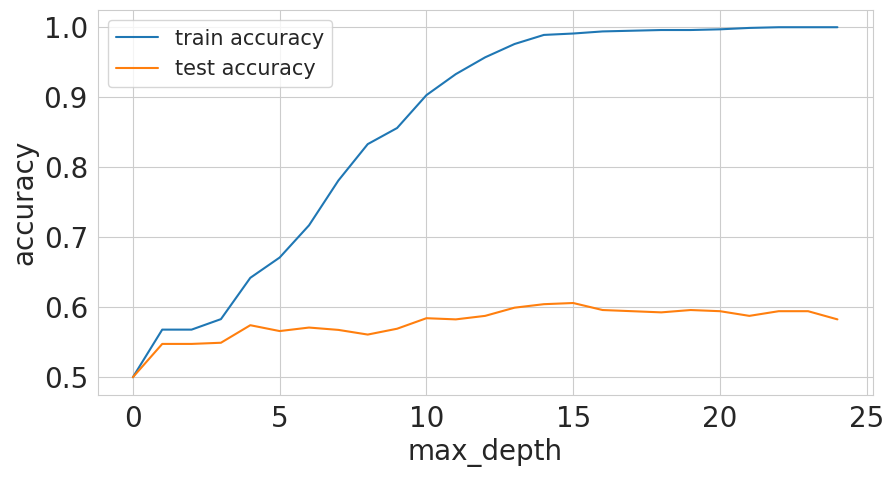

In [4]:
# scikit-learnライブラリの読み込み
from sklearn import tree 
from sklearn import metrics
# 可視化のためのmatplotlibとseabornライブラリの読み込み
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#テキストのフォントサイズの設定
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# jupyter Notebook内に画像を表示
%matplotlib inline

# 正答率を保持していくためのリストを初期化
# 学習用と検証用の2つを用意し、共に初期値は,0,5とする
train_accuracies = [0.5]
test_accuracies = [0.5]

# さまざまなdepthに対して繰り返す
for depth in range(1, 25):
    # モデルの初期化
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # 学習に利用する特微量を指定
    # この部分はループの外で実行可能
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]
    # 与えられた特微量と対応する目的変数でモデルを学習
    clf.fit(df_train[cols], df_train.quality)
    
    # 学習用と検証用データセットに対する予測
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # 学習用と検証用データセットに対する正答率を計算
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    # リストに計算結果を追加
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# matplotlibとseabornによる可視化
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show